뉴스 분류

In [571]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [572]:
# 시각화를 위한 폰트 설정
import matplotlib.font_manager as fm


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux (Colab)
        try:
            font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
            fm.FontProperties(fname=font_path)
            font_family = "NanumBarunGothic"
        except FileNotFoundError:
            # 설치되지 않은 경우 NanumGothic 폰트 사용
            font_family = "NanumGothic"

    return font_family

# seaborn 스타일 설정
sns.set_style("whitegrid")

# 폰트 설정
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [573]:
train = pd.read_csv('C:/Users/selly/OneDrive/바탕 화면/전달해요/train.csv')
test = pd.read_csv('C:/Users/selly/OneDrive/바탕 화면/전달해요/test.csv')
train.shape, test.shape

((1049, 3), (292, 2))

In [574]:
topic = pd.read_csv('C:/Users/selly/OneDrive/바탕 화면/전달해요/topic_dict.csv')
topic

,topic,topic_idx
0,목적,1
1,항목,2
2,기간,3
3,불이익,4


In [575]:
raw = pd.concat([train,test])
raw.shape

(1341, 3)

In [576]:
raw.head()

,index,title,topic_idx
0,1,"수집,이용 목적 입사를 위한 채용자격 요건 확인, 인사관리 및 내부감사, 복리후생",1.0
1,2,여행 예약 및 서비스 제공,1.0
2,3,"소속 기관(학교 명)성명, 휴대전화번호, 이메일, 생년월일, 보호자 성명, 보호자",2.0
3,4,"수집,이용 목적 학생의 건강상태 파악 및 응급처치를 위함",1.0
4,5,스팸 메시지 차단,1.0


In [577]:
raw.tail()

,index,title,topic_idx
287,1337,박후린 교수님 왜 이걸 말을 안해주셨어요,NaN
288,1338,지원자와의 의사소통 및 정보 전달 등에 이용,NaN
289,1339,"연구자등록번호, 인적사항, 학력, 경력, 연구업적 등",NaN
290,1340,눈이 귀찮아보여 이제 친구들이 모이네,NaN
291,1341,멍청하지만 그래도 착해요,NaN


In [578]:
df=raw.merge(topic, how="left")
df.shape

(1341, 4)

In [579]:
df.head()

,index,title,topic_idx,topic
0,1,"수집,이용 목적 입사를 위한 채용자격 요건 확인, 인사관리 및 내부감사, 복리후생",1.0,목적
1,2,여행 예약 및 서비스 제공,1.0,목적
2,3,"소속 기관(학교 명)성명, 휴대전화번호, 이메일, 생년월일, 보호자 성명, 보호자",2.0,항목
3,4,"수집,이용 목적 학생의 건강상태 파악 및 응급처치를 위함",1.0,목적
4,5,스팸 메시지 차단,1.0,목적


In [580]:
df["topic_idx"].value_counts()

1.0    533
3.0    243
2.0    147
4.0    126
Name: topic_idx, dtype: int64

<Axes: xlabel='count', ylabel='topic'>

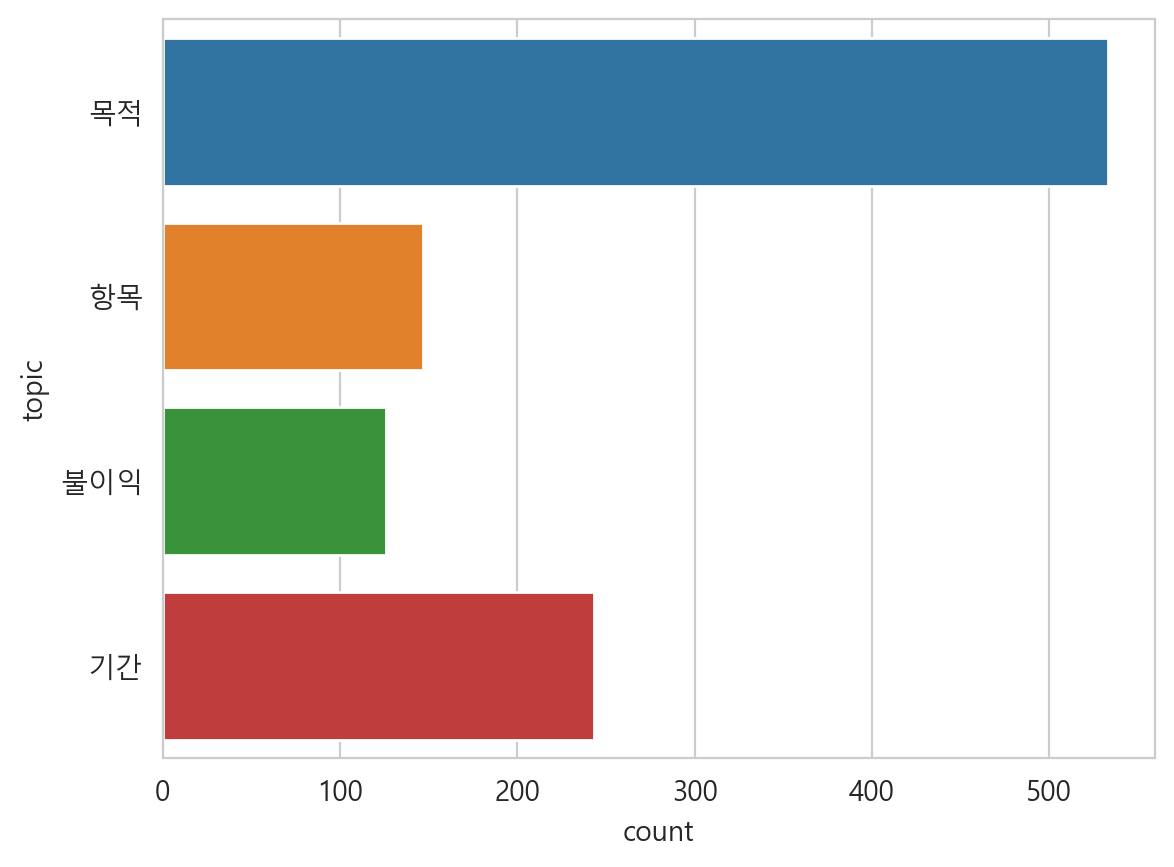

In [581]:
sns.countplot(data=df, y="topic")

In [582]:
df["len"] = df["title"].apply(lambda x:len(x))
df["word_count"] = df["title"].apply(lambda x:len(x.split()))
df["unique_word_count"] = df["title"].apply(lambda x : len(set(x.split())))

In [583]:
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,1,"수집,이용 목적 입사를 위한 채용자격 요건 확인, 인사관리 및 내부감사, 복리후생",1.0,목적,46,11,11
1,2,여행 예약 및 서비스 제공,1.0,목적,14,5,5
2,3,"소속 기관(학교 명)성명, 휴대전화번호, 이메일, 생년월일, 보호자 성명, 보호자",2.0,항목,45,9,8
3,4,"수집,이용 목적 학생의 건강상태 파악 및 응급처치를 위함",1.0,목적,32,8,8
4,5,스팸 메시지 차단,1.0,목적,9,3,3


<Axes: xlabel='unique_word_count', ylabel='Count'>

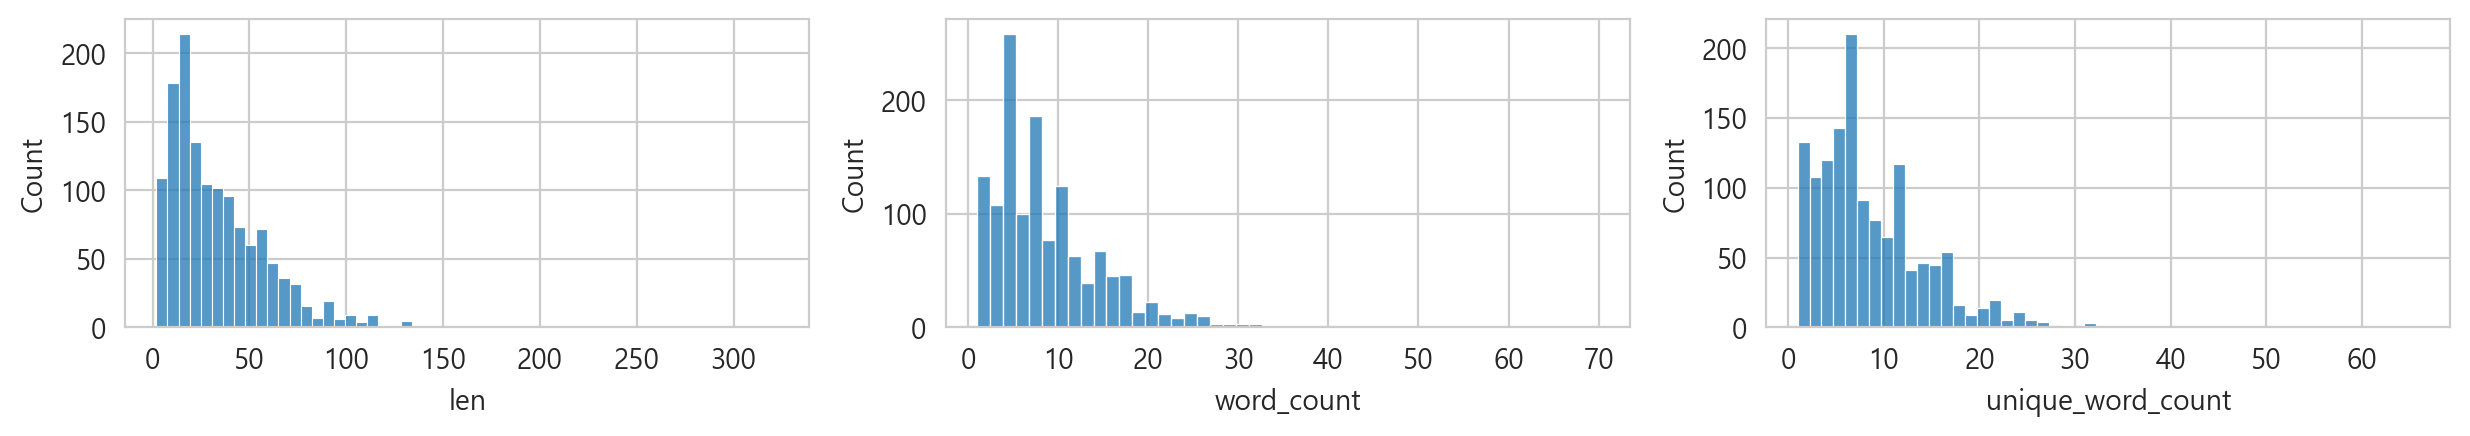

In [584]:
fig, axes = plt.subplots(1,3,figsize=(15,2))
sns.histplot(df["len"], ax=axes[0])
sns.histplot(df["word_count"],ax=axes[1] )
sns.histplot(df["unique_word_count"], ax=axes[2])

In [585]:
df[["len","word_count","unique_word_count"]].describe()

,len,word_count,unique_word_count
count,1341.000000,1341.000000,1341.000000
mean,33.897092,8.744966,8.421327
std,26.458413,6.244088,5.729796
min,2.000000,1.000000,1.000000
25%,15.000000,4.000000,4.000000
50%,26.000000,7.000000,7.000000
75%,47.000000,12.000000,11.000000
max,323.000000,70.000000,66.000000


5. 주제별 글자와 단어의 빈도 확인

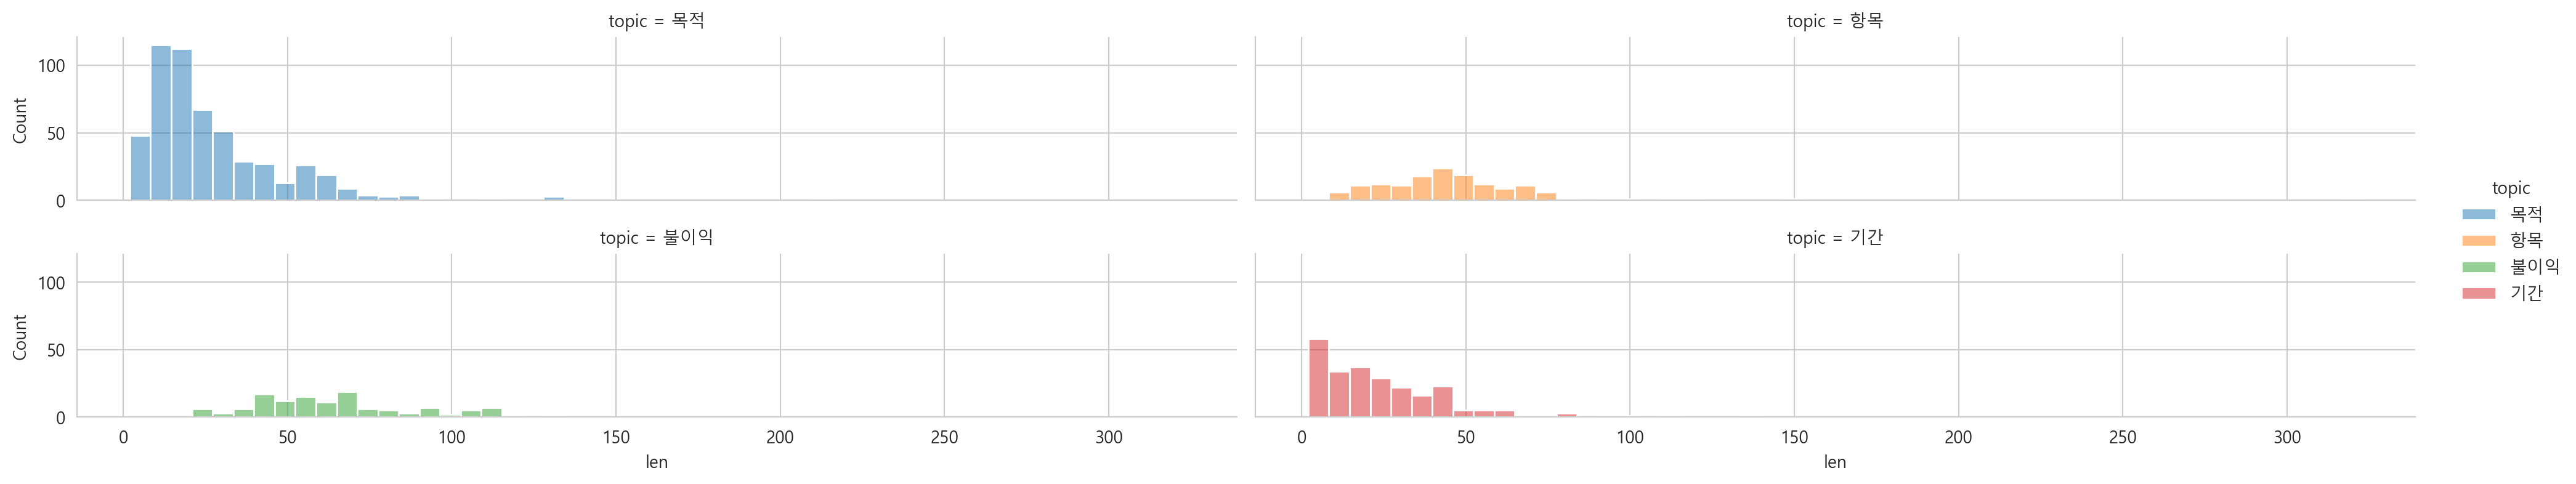

In [586]:
sns.displot(data=df, x="len", hue="topic",col="topic", col_wrap=2, aspect=5, height=2)

6. 문자 전처리하기

In [587]:
!pip install konlpy --upgrade
from konlpy.tag import Okt
okt = Okt()

def okt_clean(text):
  clean_text = []
  for word in okt.pos(text, stem=True):
    if word[1] not in ['Josa', 'Eomi','Punctuation' ]:
      clean_text.append(word[0])

  return " ".join(clean_text)

from tqdm import tqdm
tqdm.pandas()

train['title'] = train['title'].progress_map(okt_clean)
test['title'] = test['title'].progress_map(okt_clean)

100%|███████████████████████████████████████████████████████████████████████████████| 292/292 [00:00<00:00, 382.36it/s]


In [588]:
def remove_stopwords(text):
  tokens = text.split(' ')
  stops = ['합니다','하는','할','하고','한다', '그리고', '입니다', '그','등','이런','것','및','제','더','있습니다.','관련','대한','?']
  meaningful_words = [w for w in tokens if not w in stops]
  return ' '.join(meaningful_words)

In [589]:
df["title"] = df["title"].map(remove_stopwords)

In [590]:
import re
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    #text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    # 중복으로 생성된 공백값을 제거합니다.
    text = re.sub('[\s]+', ' ', text)
    # 영문자를 소문자로 만듭니다.
    text = text.lower()
    return text
#def preprocessing(text):
    # NaN 값 처리
    #if pd.isnull(text):
        #return ''

    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 나머지 전처리 작업 계속 진행
    # ...

    return text

In [591]:
df["title"] = df["title"].map(preprocessing)

7. 학습, 시험 데이터 세트 분리하기

In [592]:
label_name = "topic_idx"

In [593]:
train = df[df[label_name].notnull()]
test = df[df[label_name].isnull()]
train.shape, test.shape

((1049, 7), (292, 7))

In [594]:
X_train = train["title"]
X_test = test["title"]

X_train.shape, X_test.shape

((1049,), (292,))

In [595]:
y_train = train[label_name]
y_train.value_counts()

1.0    533
3.0    243
2.0    147
4.0    126
Name: topic_idx, dtype: int64

In [596]:
y_test = test[label_name]
y_test.value_counts()

Series([], Name: topic_idx, dtype: int64)

In [597]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=None, ngram_range=(1,2), min_df=3,max_df=0.95)
tfidf_vect.fit(X_train)

TfidfVectorizer(max_df=0.95, min_df=3, ngram_range=(1, 2))

In [598]:
train_feature_tfidf = tfidf_vect.transform(X_train)
test_feature_tfidf = tfidf_vect.transform(X_test)

train_feature_tfidf.shape, test_feature_tfidf.shape

((1049, 874), (292, 874))

In [599]:
vocab = tfidf_vect.get_feature_names_out()
print(len(vocab))
vocab[:10]

874


array(['email', 'email 주소', 'on', 'on 마을축제', '가능하며', '가능합니다', '가입',
       '가입의사', '가입의사 확인', '가족관계'], dtype=object)

In [600]:
dist = np.sum(train_feature_tfidf, axis=0)

vocab_count = pd.DataFrame(dist, columns=vocab)
vocab_count

,email,email 주소,on,on 마을축제,가능하며,가능합니다,가입,가입의사,가입의사 확인,가족관계,...,회원의,회원자격,회원자격 유지,회원제,회원제 서비스,휴대전화,휴대전화번호,휴대전화번호 전자우편주소,휴대폰,휴대폰번호
0,1.652788,0.997515,0.882513,0.882513,0.918818,0.951853,5.980532,2.377093,2.377093,1.173867,...,1.632405,1.549078,1.549078,2.335195,1.920283,2.216339,2.622763,0.817101,1.944333,2.31884


In [601]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=42)
model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [602]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, train_feature_tfidf, y_train, cv=3, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished


In [603]:
valid_accuracy = (y_pred == y_train).mean()
valid_accuracy

0.9199237368922784

In [604]:
df_accuracy = pd.DataFrame({"pred":y_pred, "train": y_train})
df_accuracy["accurancy"] = (y_pred == y_train)

In [605]:
%time model.fit(train_feature_tfidf, y_train)

CPU times: total: 1.5 s
Wall time: 424 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [606]:
max_proba = np.max(proba, axis=1)  # 각 샘플의 최대 확률값을 담은 배열
y_predit = [model.classes_[np.argmax(p)] if max_proba[i] > 0.8 else -1 for i, p in enumerate(proba)]
y_predit[:5]

[3.0, -1, -1, 1.0, 1.0]

In [607]:
# 모델 학습 후
model.fit(train_feature_tfidf, y_train)

# 예측 확률 구하기
proba = model.predict_proba(test_feature_tfidf)

# 확률이 가장 높은 클래스와 그 확률 출력
for i, p in enumerate(proba):
    max_proba = np.max(p)
    pred_class = np.argmax(p)
    if max_proba < 0.8:  # 임계값 설정
        pred_class = -1  # 임계값 이하일 경우 -1로 설정
    print(f"Sample {i}: Class {pred_class}, Probability {max_proba}")



Sample 0: Class 2, Probability 0.9944444444444445
Sample 1: Class -1, Probability 0.43
Sample 2: Class -1, Probability 0.7775166439042542
Sample 3: Class 0, Probability 0.97
Sample 4: Class 0, Probability 0.97
Sample 5: Class 0, Probability 0.9716015775837344
Sample 6: Class 2, Probability 1.0
Sample 7: Class 0, Probability 0.99
Sample 8: Class -1, Probability 0.67
Sample 9: Class 1, Probability 0.89
Sample 10: Class 0, Probability 1.0
Sample 11: Class 2, Probability 1.0
Sample 12: Class 3, Probability 0.9
Sample 13: Class 0, Probability 0.8337381195769901
Sample 14: Class 0, Probability 0.88
Sample 15: Class -1, Probability 0.5804202808580768
Sample 16: Class -1, Probability 0.685
Sample 17: Class 0, Probability 0.8649961958075888
Sample 18: Class 0, Probability 0.9915293342122611
Sample 19: Class 2, Probability 1.0
Sample 20: Class -1, Probability 0.6220475113122172
Sample 21: Class 0, Probability 0.9856756756756756
Sample 22: Class 3, Probability 0.84
Sample 23: Class 2, Probability

In [608]:
import joblib
# TfidfVectorizer 객체 저장
joblib.dump(tfidf_vect, 'tfidf_vect.pkl')

# RandomForestClassifier 모델 저장
joblib.dump(model, 'model.pkl')

['model.pkl']

In [609]:
submit = pd.read_csv('C:/Users/selly/OneDrive/바탕 화면/전달해요/sub.csv')
submit.head()

,index,topic_idx
0,1050,0
1,1051,0
2,1052,0
3,1053,0
4,1054,0


In [610]:
submit.shape

(292, 2)

In [611]:
submit["topic_idx"] = y_predit

In [612]:
submit.to_csv('C:/Users/selly/OneDrive/바탕 화면/전달해요/sub1.csv', index=False)